0.33919268767007865 0.06195812422251055


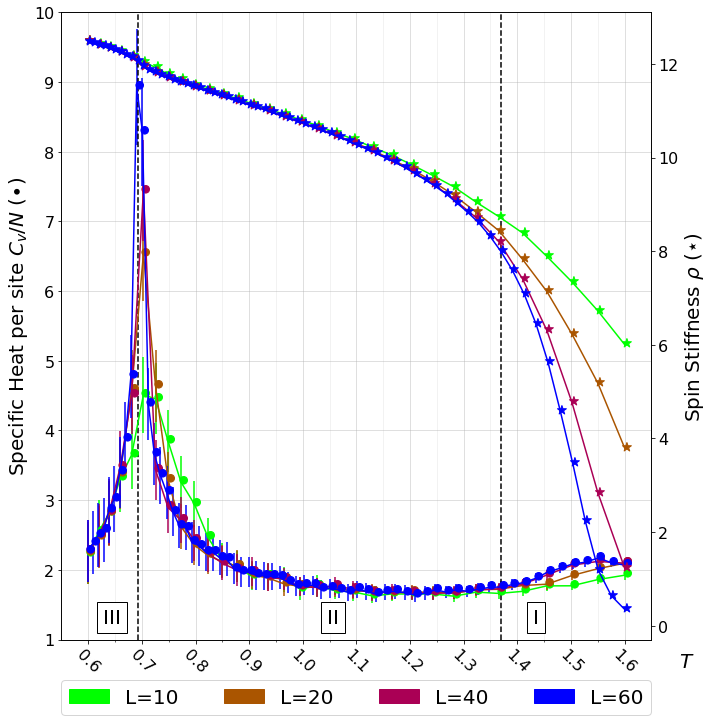

In [6]:
#matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import math
import sys
import os
from random import shuffle
from random import gauss
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fmin
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pylab import polyfit 
import matplotlib.ticker as ticker
from matplotlib import gridspec
from scipy.optimize import differential_evolution
import warnings
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline



def fit_func_cv(x, b, c, d):
        return  b*np.absolute(x - d)**(-c)


######
#-----------------------------------------------------------------------------------------------------------------------
#######
#parameters of the code
######
#-----------------------------------------------------------------------------------------------------------------------
######

j2 = 0.5
j6 = 2.0 - j2
Kc = 0.0
lambda3 = 2.1
q_Q = 1
N_list = [10, 20, 40, 60]

####
#code
###

#
#get data for specific heat
#extract the data to plot

all_data_therm = []
all_error_therm = []
all_data_stiff = []
all_error_stiff = []
all_temps = []
Tmin_l = []
Tmax_l = []

all_data_N = np.load('data_lowD.npy',allow_pickle=True)

for n in range(len(N_list)):
    N = N_list[n]


    data_thermo = (N**2)*np.array(all_data_N[n][1])
    error_thermo = ((N))*np.array(all_data_N[n][2])
    data_stiff = np.array(all_data_N[n][3])
    error_stiff = np.array(all_data_N[n][4])
    range_temp = np.array(all_data_N[n][0])

    all_data_therm.append(data_thermo)
    all_error_therm.append(error_thermo)
    all_data_stiff.append(data_stiff)
    all_error_stiff.append(error_stiff)
    all_temps.append(range_temp)
    Tmin_l.append(np.min(range_temp))
    Tmax_l.append(np.max(range_temp))

####
#analysis for last N
####


########
#find temp of max of spheat

#works on the last N to be given
########

cv_max = []
cv_max_temp = []

cv_max_1 = []
cv_max_temp_1 = []

orig_temp_r = range_temp

numb_of_try = 10*len(orig_temp_r)

for u in range(numb_of_try):
    alt_data = np.array([gauss(data_thermo[h], error_thermo[h]) for h in range(len(orig_temp_r))])
    cv_max_1.append(np.max(alt_data))
    cv_max_temp_1.append(orig_temp_r[np.argmax(alt_data)])

#T and Cv analysis : get means and std
#then plot errorbar

cv_max.append(np.mean(cv_max_1))
cv_max_temp.append(np.mean(cv_max_temp_1))
cv_max_temp_final = cv_max_temp[0] 

#print cv_max, cv_max_temp

######
#get rho intercept
######
rho_temp = range_temp[np.argmin(np.absolute(data_stiff - 18*range_temp/np.pi))]


#####
#compute cv_max values
cv_max = []
cv_max_temp = []

cv_result_temp = []
cv_result_max = []
cv_result_temp_err = []
cv_result_max_err = []
for i in range(len(N_list)):
    cv_max_1 = []
    cv_max_temp_1 = []

    orig_temp_r = all_temps[i]

    numb_of_try = 10*len(orig_temp_r)

    for u in range(numb_of_try):
        alt_data = np.array([gauss(all_data_therm[i][h], all_error_therm[i][h]) for h in range(len(orig_temp_r))])
        cv_max_1.append(np.max(alt_data))
        cv_max_temp_1.append(orig_temp_r[np.argmax(alt_data)])

    #T and Cv analysis : get means and std
    #then plot errorbar

    cv_result_temp.append(np.mean(cv_max_temp_1)) #temp at which max
    cv_result_max.append(np.mean(cv_max_1)) #value of max
    cv_result_temp_err.append(np.std(cv_max_temp_1))
    cv_result_max_err.append(np.std(cv_max_1))

    cv_max.append(cv_max_1)
    cv_max_temp.append(cv_max_temp_1)
    
#print(cv_result_max)
#print(cv_result_max_err)


######
#- initialize plot
######
Blocks_size = ['o','x']
#colors_size = ['blue', 'red', 'green', 'brown']

cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='brg_r')
colors_size = [scalarMap.to_rgba(i/(len(N_list)-1)) for i in range(len(N_list))]

fig, ax1 = plt.subplots(figsize = (10,10))

markers = [r"$\bullet$", r"$\star$"]

#one one side plot Cv
color = colors_size[0]
ax1.set_ylabel(r'Specific Heat per site $C_v/N$ ($\bullet$)', color='black', fontsize = 20)
#print data_thermo
#print error_thermo
for i in range(len(N_list)):
	ax1.errorbar(all_temps[i], all_data_therm[i], \
		yerr = all_error_therm[i] , color = colors_size[i], linestyle = '-',marker = markers[0], markersize = 12)

Tmin = np.min(Tmin_l)
Tmax = np.max(Tmax_l)
#major_ticks = np.linspace(Tmin, Tmax, int((Tmax - Tmin)/0.1)+1)                                              
#minor_ticks = np.linspace(Tmin, Tmax, int((Tmax - Tmin)/0.05)+1) 
major_ticks = np.arange(Tmin, Tmax + 0.01, 0.1)
minor_ticks = np.arange(Tmin, Tmax + 0.01, 0.05)

ax1.tick_params(axis='y', labelcolor='black', labelsize = 16)
ax1.set_xticks(major_ticks)     
tick_print = []
for elem in major_ticks:
    tick_print.append('{:.1f}'.format(elem))
ax1.set_xticks(minor_ticks, minor=True)  
ax1.set_xticklabels(tick_print, rotation=315, fontsize = 16) 
ax1.set_xlabel(r'$T$', fontsize = 20)
ax1.xaxis.set_label_coords(1.06, -0.02)
ax1.grid(which='minor', alpha=0.2)                                                
ax1.grid(which='major', alpha=0.5)
 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#plot rho
color = colors_size[1]
ax2.set_ylabel(r'Spin Stiffness $\rho$ ($\star$)', color='black', fontsize = 20)
for i in range(len(N_list)):
	ax2.errorbar(all_temps[i], all_data_stiff[i], yerr = all_error_stiff[i],\
	 color = colors_size[i], linestyle = '-', marker = markers[1], markersize = 12)
ax2.tick_params(axis='y', labelcolor='black', labelsize = 16)

patches_lg = []
for i in range(len(N_list)):
    patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
ax1.legend(handles=patches_lg, bbox_to_anchor=(0,-0.12,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4,fontsize = 20)

#put the dotted lines for the 
ylimits = [1, 10]
ax1.plot([rho_temp, rho_temp], ylimits, color = 'black', linestyle = '--')
ax1.plot([cv_max_temp_final, cv_max_temp_final], ylimits, color = 'black', linestyle = '--')
ax1.set_ylim(ylimits)

#add the text

textstr = r'III'
ax2.text(0.07, 0.05, textstr, transform=ax2.transAxes, fontsize=20,
    verticalalignment='top', bbox= dict(boxstyle='square', fc="w", ec="k"))
textstr = r'II'
ax2.text(0.45, 0.05, textstr, transform=ax2.transAxes, fontsize=20,
    verticalalignment='top', bbox= dict(boxstyle='square', fc="w", ec="k"))
textstr = r'I'
ax2.text(0.8, 0.05, textstr, transform=ax2.transAxes, fontsize=20,
    verticalalignment='top', bbox= dict(boxstyle='square', fc="w", ec="k"))


#####
#add the inset of C_v scaling
x_range_log = np.log(N_list)
cross_2 = np.array(cv_result_max)
cross_2_err = np.array(cv_result_max_err)
cross_2_err_mod = cross_2_err/cross_2

def fit_func(xrange_l, a, b):
    return a + b*xrange_l

def fit_func_2(xrange_l, a, b):
    return b*(xrange_l) + a


popt2, pcov2 = curve_fit(fit_func_2, x_range_log, np.log(cross_2), \
    sigma = cross_2_err/cross_2, absolute_sigma = True, bounds = ([0.1, 0.05], [20, 1.5]))

#print 'vals of fit of max of Cv: a + L^b'
#print popt2
e2 = np.sqrt(np.diag(pcov2))[1]
#print 'errors'
#print np.sqrt(np.diag(pcov2))
print(popt2[1], np.sqrt(np.diag(pcov2))[1])
y2  = np.exp(fit_func(x_range_log, *popt2))

"""
left, bottom, width, height = [0.67, 0.73, 0.23, 0.23]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_ylabel(r'$C_v^{max}/N$', color='black')
ax3.set_xlabel(r'$\ln \; L$', color='black')
ax3.errorbar(x_range_log, cross_2, yerr = cross_2_err, color = 'black', marker = 'o', linestyle = '')
ax3.plot(x_range_log, y2, color='black', linestyle = '--', label = r'$C_v^{max} \propto L^{\alpha/\nu}$')
ax3.legend()
"""

fig.tight_layout()
plt.savefig('./fig-lowD.png', format='png',dpi = 100, bbox_inches='tight')
plt.show()
#plt.savefig('./all_fig/' + 'rhoCvJ2{:.2f}'.format(j2)+ '.png', format='png', bbox_inches='tight')



0.346245922091514 0.057798269337758786


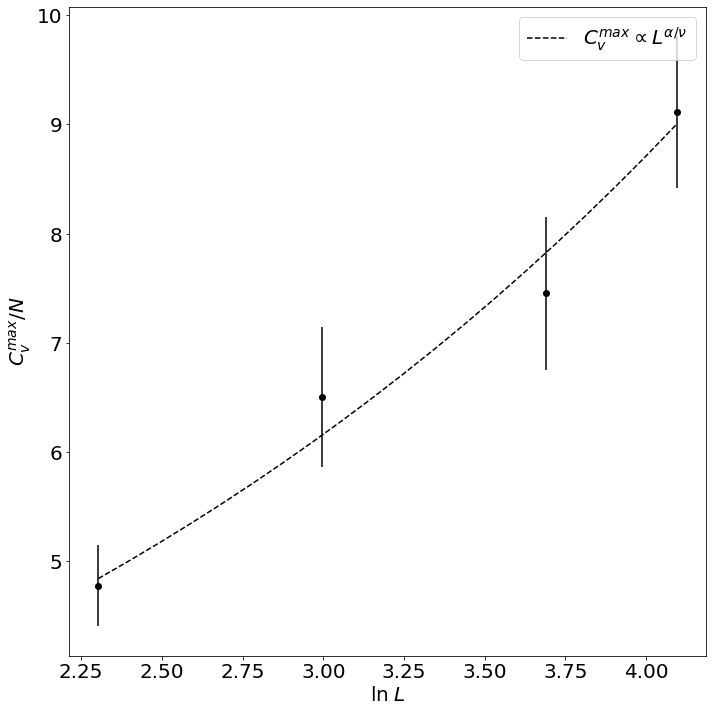

In [5]:
fig, ax3 = plt.subplots(figsize = (10,10))

#####
#add the inset of C_v scaling
x_range_log = np.log(N_list)
cross_2 = np.array(cv_result_max)
cross_2_err = np.array(cv_result_max_err)
cross_2_err_mod = cross_2_err/cross_2

def fit_func(xrange_l, a, b):
    return a + b*xrange_l

def fit_func_2(xrange_l, a, b):
    return b*(xrange_l) + a


popt2, pcov2 = curve_fit(fit_func_2, x_range_log, np.log(cross_2), \
    sigma = cross_2_err/cross_2, absolute_sigma = True, bounds = ([0.1, 0.05], [20, 1.5]))

#print 'vals of fit of max of Cv: a + L^b'
#print popt2
e2 = np.sqrt(np.diag(pcov2))[1]
#print 'errors'
#print np.sqrt(np.diag(pcov2))
print(popt2[1], np.sqrt(np.diag(pcov2))[1])
y2  = np.exp(fit_func(np.linspace(np.min(x_range_log), np.max(x_range_log), num = 20), *popt2))

ax3.set_ylabel(r'$C_v^{max}/N$', color='black', fontsize = 20)
ax3.set_xlabel(r'$\ln \; L$', color='black', fontsize = 20)
ax3.tick_params(axis='x', labelcolor='black', labelsize = 20)
ax3.tick_params(axis='y', labelcolor='black', labelsize = 20)
ax3.errorbar(x_range_log, cross_2, yerr = cross_2_err, color = 'black', marker = 'o', linestyle = '')
ax3.plot(np.linspace(np.min(x_range_log), np.max(x_range_log), num = 20), y2, color='black', linestyle = '--', label = r'$C_v^{max} \propto L^{\alpha/\nu}$')
ax3.legend(fontsize = 20)

fig.tight_layout()
plt.savefig('./supp_smallDelta.png', format='png',dpi = 100, bbox_inches='tight')
plt.show()